# Objective


We aim to:

1. Analyze unicorn startups (valuation > $1B).

2. Understand which sectors, countries, and investors dominate.

3. Predict the valuation of a startup based on features like country, sector, and joining date.

# Scope
We will:

1. Clean and prepare the unicorn dataset.

2. Perform Exploratory Data Analysis (EDA).

3. Build Machine Learning models to predict valuation.

# Loading the data sets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\KHAN\\Downloads\\unicorns till sep 2022.csv')

In [4]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


# Data Cleaning & Preparation

In [5]:
# Remove leading/trailing spaces from column names

df.columns = df.columns.str.strip()


In [6]:
print(df.columns)

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Investors'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


# Converting the datatype as per requirement

Convert "Valuation ($B)" to numeric


In [8]:
# Remove the dollar sign and convert to float

df['Valuation ($B)'] = df['Valuation ($B)'].replace('[\$,]', '', regex=True).astype(float)


Convert "Date Joined" to datetime + extract Month and Year

In [9]:
# Convert to datetime

df['Date Joined'] = pd.to_datetime(df['Date Joined'])


# Extract month and year

df['Month'] = df['Date Joined'].dt.month
df['Year'] = df['Date Joined'].dt.year


Split Top 4 Investors into Columns



In [10]:
# Handle missing 'Investors' first

df['Investors'] = df['Investors'].fillna('Unknown')


# Split by comma into 4 new columns
df[['Investor_1', 'Investor_2', 'Investor_3', 'Investor_4']] = df['Investors'].str.split(',', expand=True).iloc[:, :4]


Check for Missing Values

In [11]:
# Check how many missing values in each column
df.isnull().sum()


Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Investors            0
Month                0
Year                 0
Investor_1           0
Investor_2          68
Investor_3         159
Investor_4        1176
dtype: int64

Replacing Nans values in investors columns with unkown 

In [12]:
investor_cols = ['Investor_1', 'Investor_2', 'Investor_3', 'Investor_4']
df[investor_cols] = df[investor_cols].fillna('Unknown')


In [13]:
df.isnull().sum()


Company           0
Valuation ($B)    0
Date Joined       0
Country           0
City              0
Industry          0
Investors         0
Month             0
Year              0
Investor_1        0
Investor_2        0
Investor_3        0
Investor_4        0
dtype: int64

# Exploratory Data Analysis (EDA)

The goal here is to visualize and understand patterns in the dataset.


📊 Distribution of Unicorn Valuations

🌍 Top Countries Producing Unicorns

🏢 Top Sectors with Most Unicorns

📈 Trend of Unicorns Created Over Time

💰 Total Valuation by Country

# Distribution of Unicorn Valuations

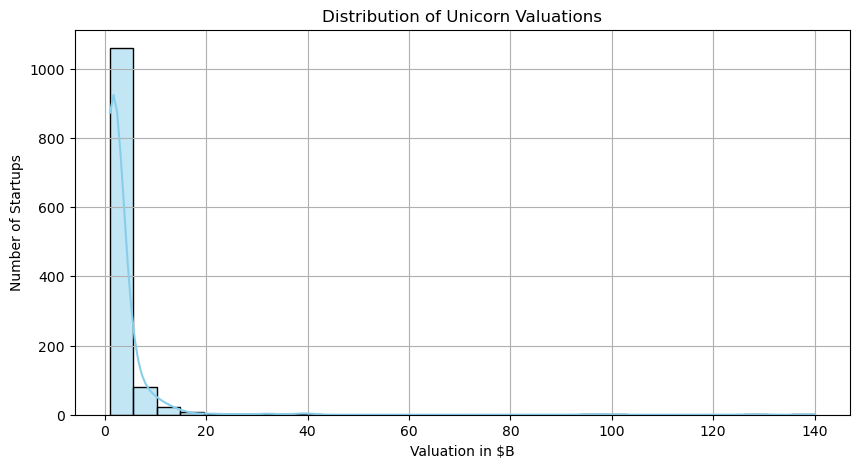

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Valuation ($B)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Unicorn Valuations')
plt.xlabel('Valuation in $B')
plt.ylabel('Number of Startups')
plt.grid(True)
plt.show()


# Top 10 Countries Producing Unicorns



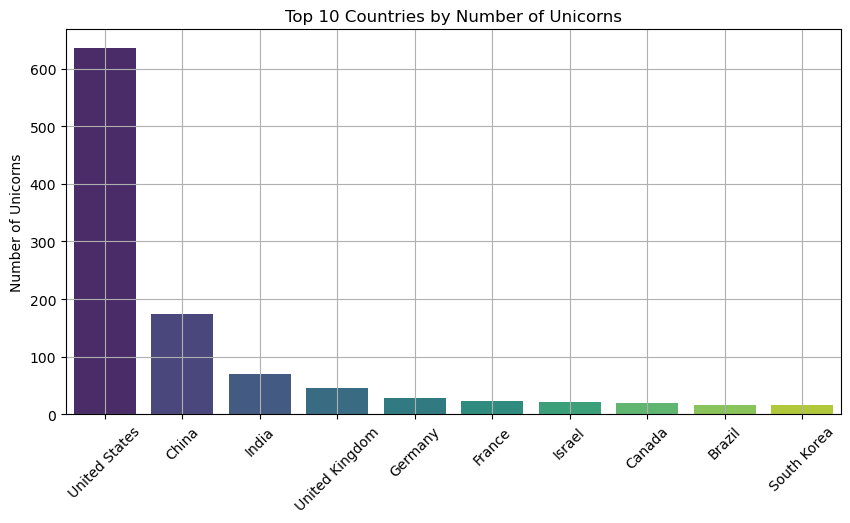

In [15]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Number of Unicorns')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Top 10 Industries with Most Unicorns

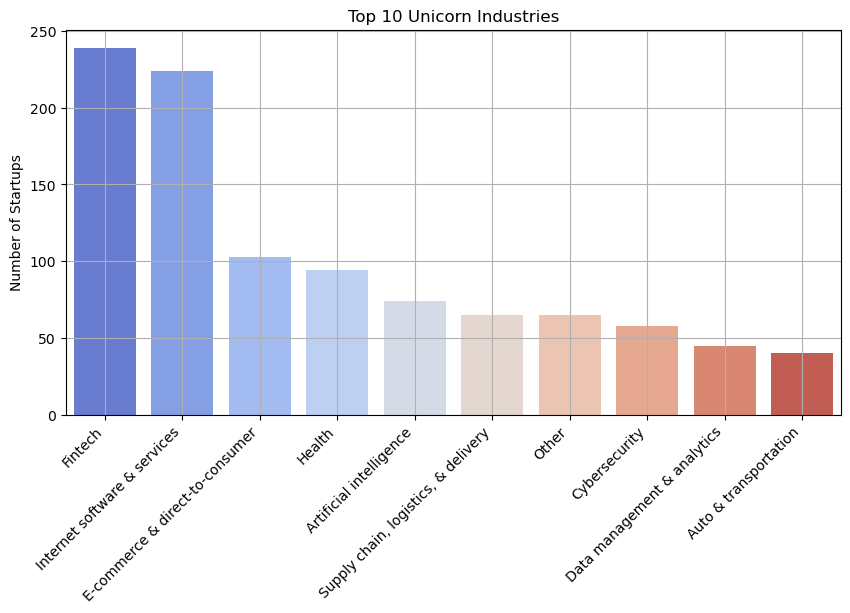

In [16]:
top_industries = df['Industry'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_industries.index, y=top_industries.values, palette='coolwarm')
plt.title('Top 10 Unicorn Industries')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


# Unicorn Creation Over Time (Yearly Trend)

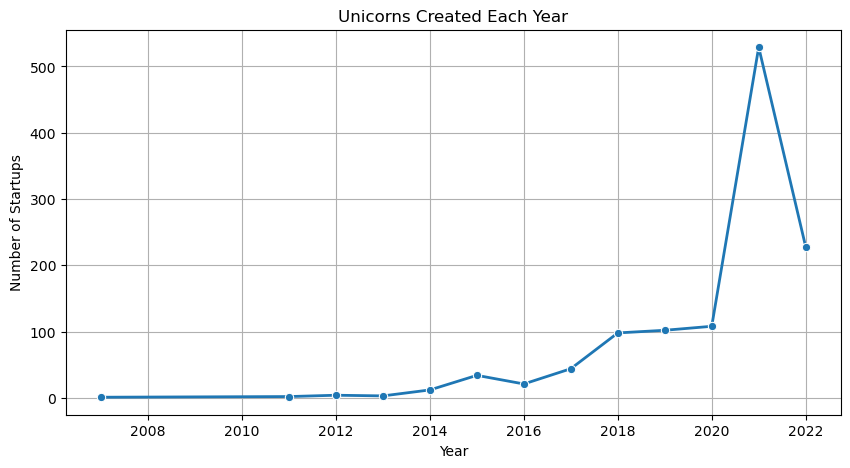

In [17]:
yearly_unicorns = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_unicorns.index, y=yearly_unicorns.values, marker='o', linewidth=2)
plt.title('Unicorns Created Each Year')
plt.ylabel('Number of Startups')
plt.xlabel('Year')
plt.grid(True)
plt.show()


# Total Valuation by Top 10 Countries

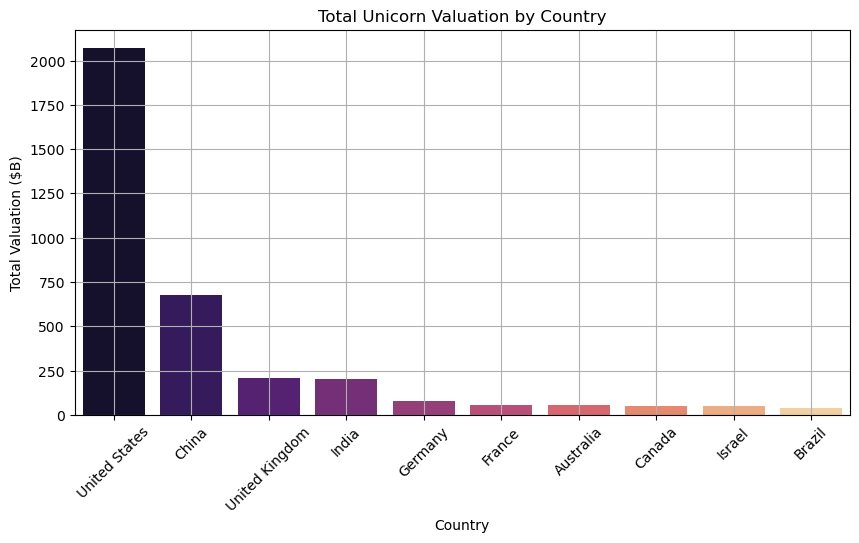

In [18]:
top_valuation = df.groupby('Country')['Valuation ($B)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_valuation.index, y=top_valuation.values, palette='magma')
plt.title('Total Unicorn Valuation by Country')
plt.ylabel('Total Valuation ($B)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Feature Engineering

 Drop Irrelevant Columns:

In [19]:
# Drop columns not needed for prediction

df_model = df.drop(['Company', 'City', 'Date Joined', 'Investors', 'Investor_2', 'Investor_3', 'Investor_4'], axis=1)


One-Hot Encode Categorical Features



In [20]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_model, columns=['Country', 'Industry', 'Investor_1'], drop_first=True)


Splitting  Features and Target Variable

In [21]:
# Features and target

X = df_encoded.drop('Valuation ($B)', axis=1)
y = df_encoded['Valuation ($B)']


# Model Building

We’ll build two regression models:

Linear Regression — good baseline

Random Forest Regressor — more powerful, handles non-linearity

And also:
1.Split data into training and test sets

2.Standardize features

3.Train both models

4.Make predictions

In [22]:
#Importing the required libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Splitting the Data

In [23]:
# Split into train and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature scaling

In [24]:
# Standardize features (important for linear models)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training Linear Regression Model

In [25]:
# Train linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)


# Train Random Forest Regressor




In [26]:
# Train random forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)


#  Evaluating Both Models



In [27]:
# Linear Regression metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Linear Regression MSE:", round(mse_lr, 2))
print("Linear Regression R²:", round(r2_lr, 2))

print("Random Forest MSE:", round(mse_rf, 2))
print("Random Forest R²:", round(r2_rf, 2))


Linear Regression MSE: 3.086166461498608e+29
Linear Regression R²: -3.512163532304944e+28
Random Forest MSE: 27.84
Random Forest R²: -2.17


# Model Tuning and Optimization (Random Forest)

Import GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV


Define Parameter Grid

In [33]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}


Running GridSearchCV

In [34]:
# Initialize grid search
grid_search = GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=5, n_jobs=-1,verbose=2)  # 5-fold cross-validation

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits


Evaluate Optimized Model

In [35]:
# Predictions with optimized model
y_pred_rf_optimized = best_rf_model.predict(X_test)

# Evaluation
mse_rf_optimized = mean_squared_error(y_test, y_pred_rf_optimized)
r2_rf_optimized = r2_score(y_test, y_pred_rf_optimized)

print("Optimized Random Forest MSE:", round(mse_rf_optimized, 2))
print("Optimized Random Forest R²:", round(r2_rf_optimized, 2))


Optimized Random Forest MSE: 30.89
Optimized Random Forest R²: -2.52


# Interpretation:
Compare optimized model metrics vs. original Random Forest.

A higher R² and lower MSE means the tuning worked.

